### <font color=red>Data Preprocessing</font>
### <font color=red>B.Charan Sai</font>
### <font color=red>19314,CSE-D</font>

### <font color=orange>Data Loading</font>

In [62]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv("UCI_Credit_Card.csv")
# Reading the data

#### Check the data

In [64]:
df.dtypes
# checking the datatypes of columns

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [65]:
df.rename(columns={'default.payment.next.month':'Target'},inplace=True)
#Renaming the target varible column name

#### Finding missing values

In [66]:
# Checking any null values are present in the data
# No missing values are there
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Target,0,0.0
PAY_6,0,0.0
LIMIT_BAL,0,0.0
SEX,0,0.0
EDUCATION,0,0.0
MARRIAGE,0,0.0
AGE,0,0.0
PAY_0,0,0.0
PAY_2,0,0.0
PAY_3,0,0.0


#### Standardization of the data

In [67]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit_transform(df)
data_df = pd.DataFrame(std_scale, columns=df.columns)
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Target
0,-1.731993,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378
1,-1.731878,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378
2,-1.731762,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942
3,-1.731647,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942
4,-1.731531,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942


### <font color=blue>Data Summarization</font>

In [68]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [69]:
print("Credit Card Clients data -  rows:",df.shape[0]," columns:", data_df.shape[1])

Credit Card Clients data -  rows: 30000  columns: 25


In [70]:
df.describe(include='all').T # Descriptive analysis

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [71]:
df['LIMIT_BAL'].value_counts().shape

(81,)

In [72]:
df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

In [73]:
# Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity. 
# Variance inflation factors (VIF) measure how much the variance of the estimated regression 
# coefficients are inflated as compared to when the predictor variables are not linearly related.

from statsmodels.stats.outliers_influence import variance_inflation_factor
data= df.drop(['Target','ID'],1)
factor = pd.DataFrame()
factor['Features']= data.columns
factor['VIF']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
factor

,Features,VIF
0,LIMIT_BAL,4.037479
1,SEX,9.092210
2,EDUCATION,6.731119
3,MARRIAGE,6.265388
4,AGE,10.857679
5,PAY_0,1.918276
6,PAY_2,3.211217
7,PAY_3,3.727427
8,PAY_4,4.440120
9,PAY_5,4.985856


### <font color=green>Data Visualization</font>

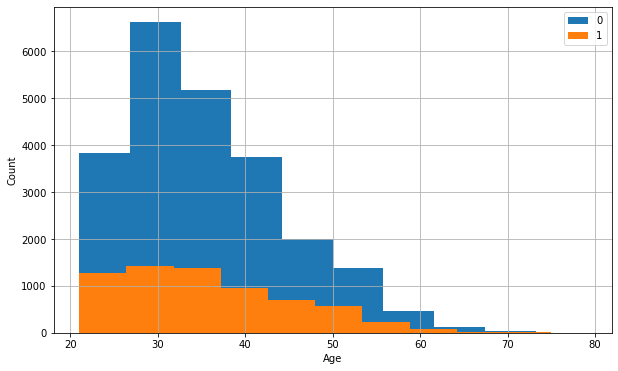

In [74]:
# Histogram analysis Count and Age
plt.figure(figsize=(10,6))
df.groupby('Target')['AGE'].hist(legend=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

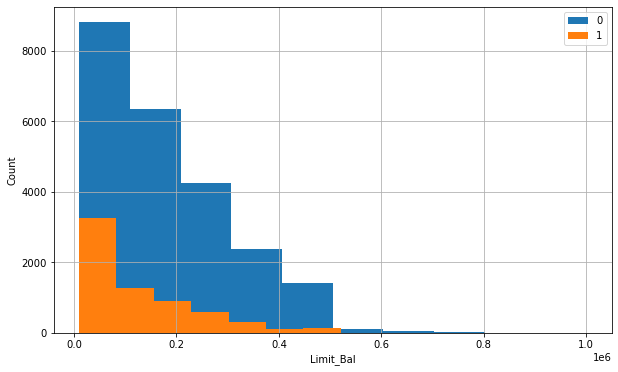

In [75]:
plt.figure(figsize=(10,6))
df.groupby('Target')['LIMIT_BAL'].hist(legend=True)
plt.xlabel('Limit_Bal')
plt.ylabel('Count')
plt.show()

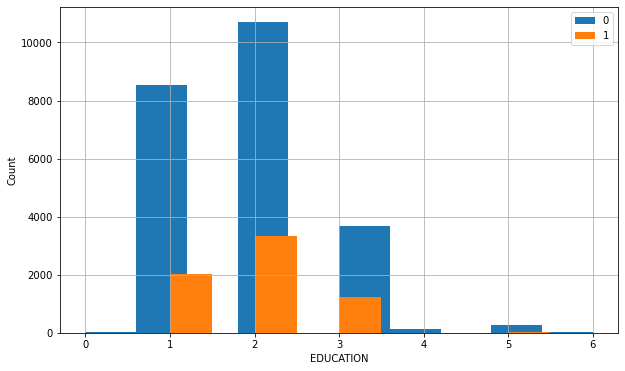

In [76]:
plt.figure(figsize=(10,6))
df.groupby('Target')['EDUCATION'].hist(legend=True)
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.show()

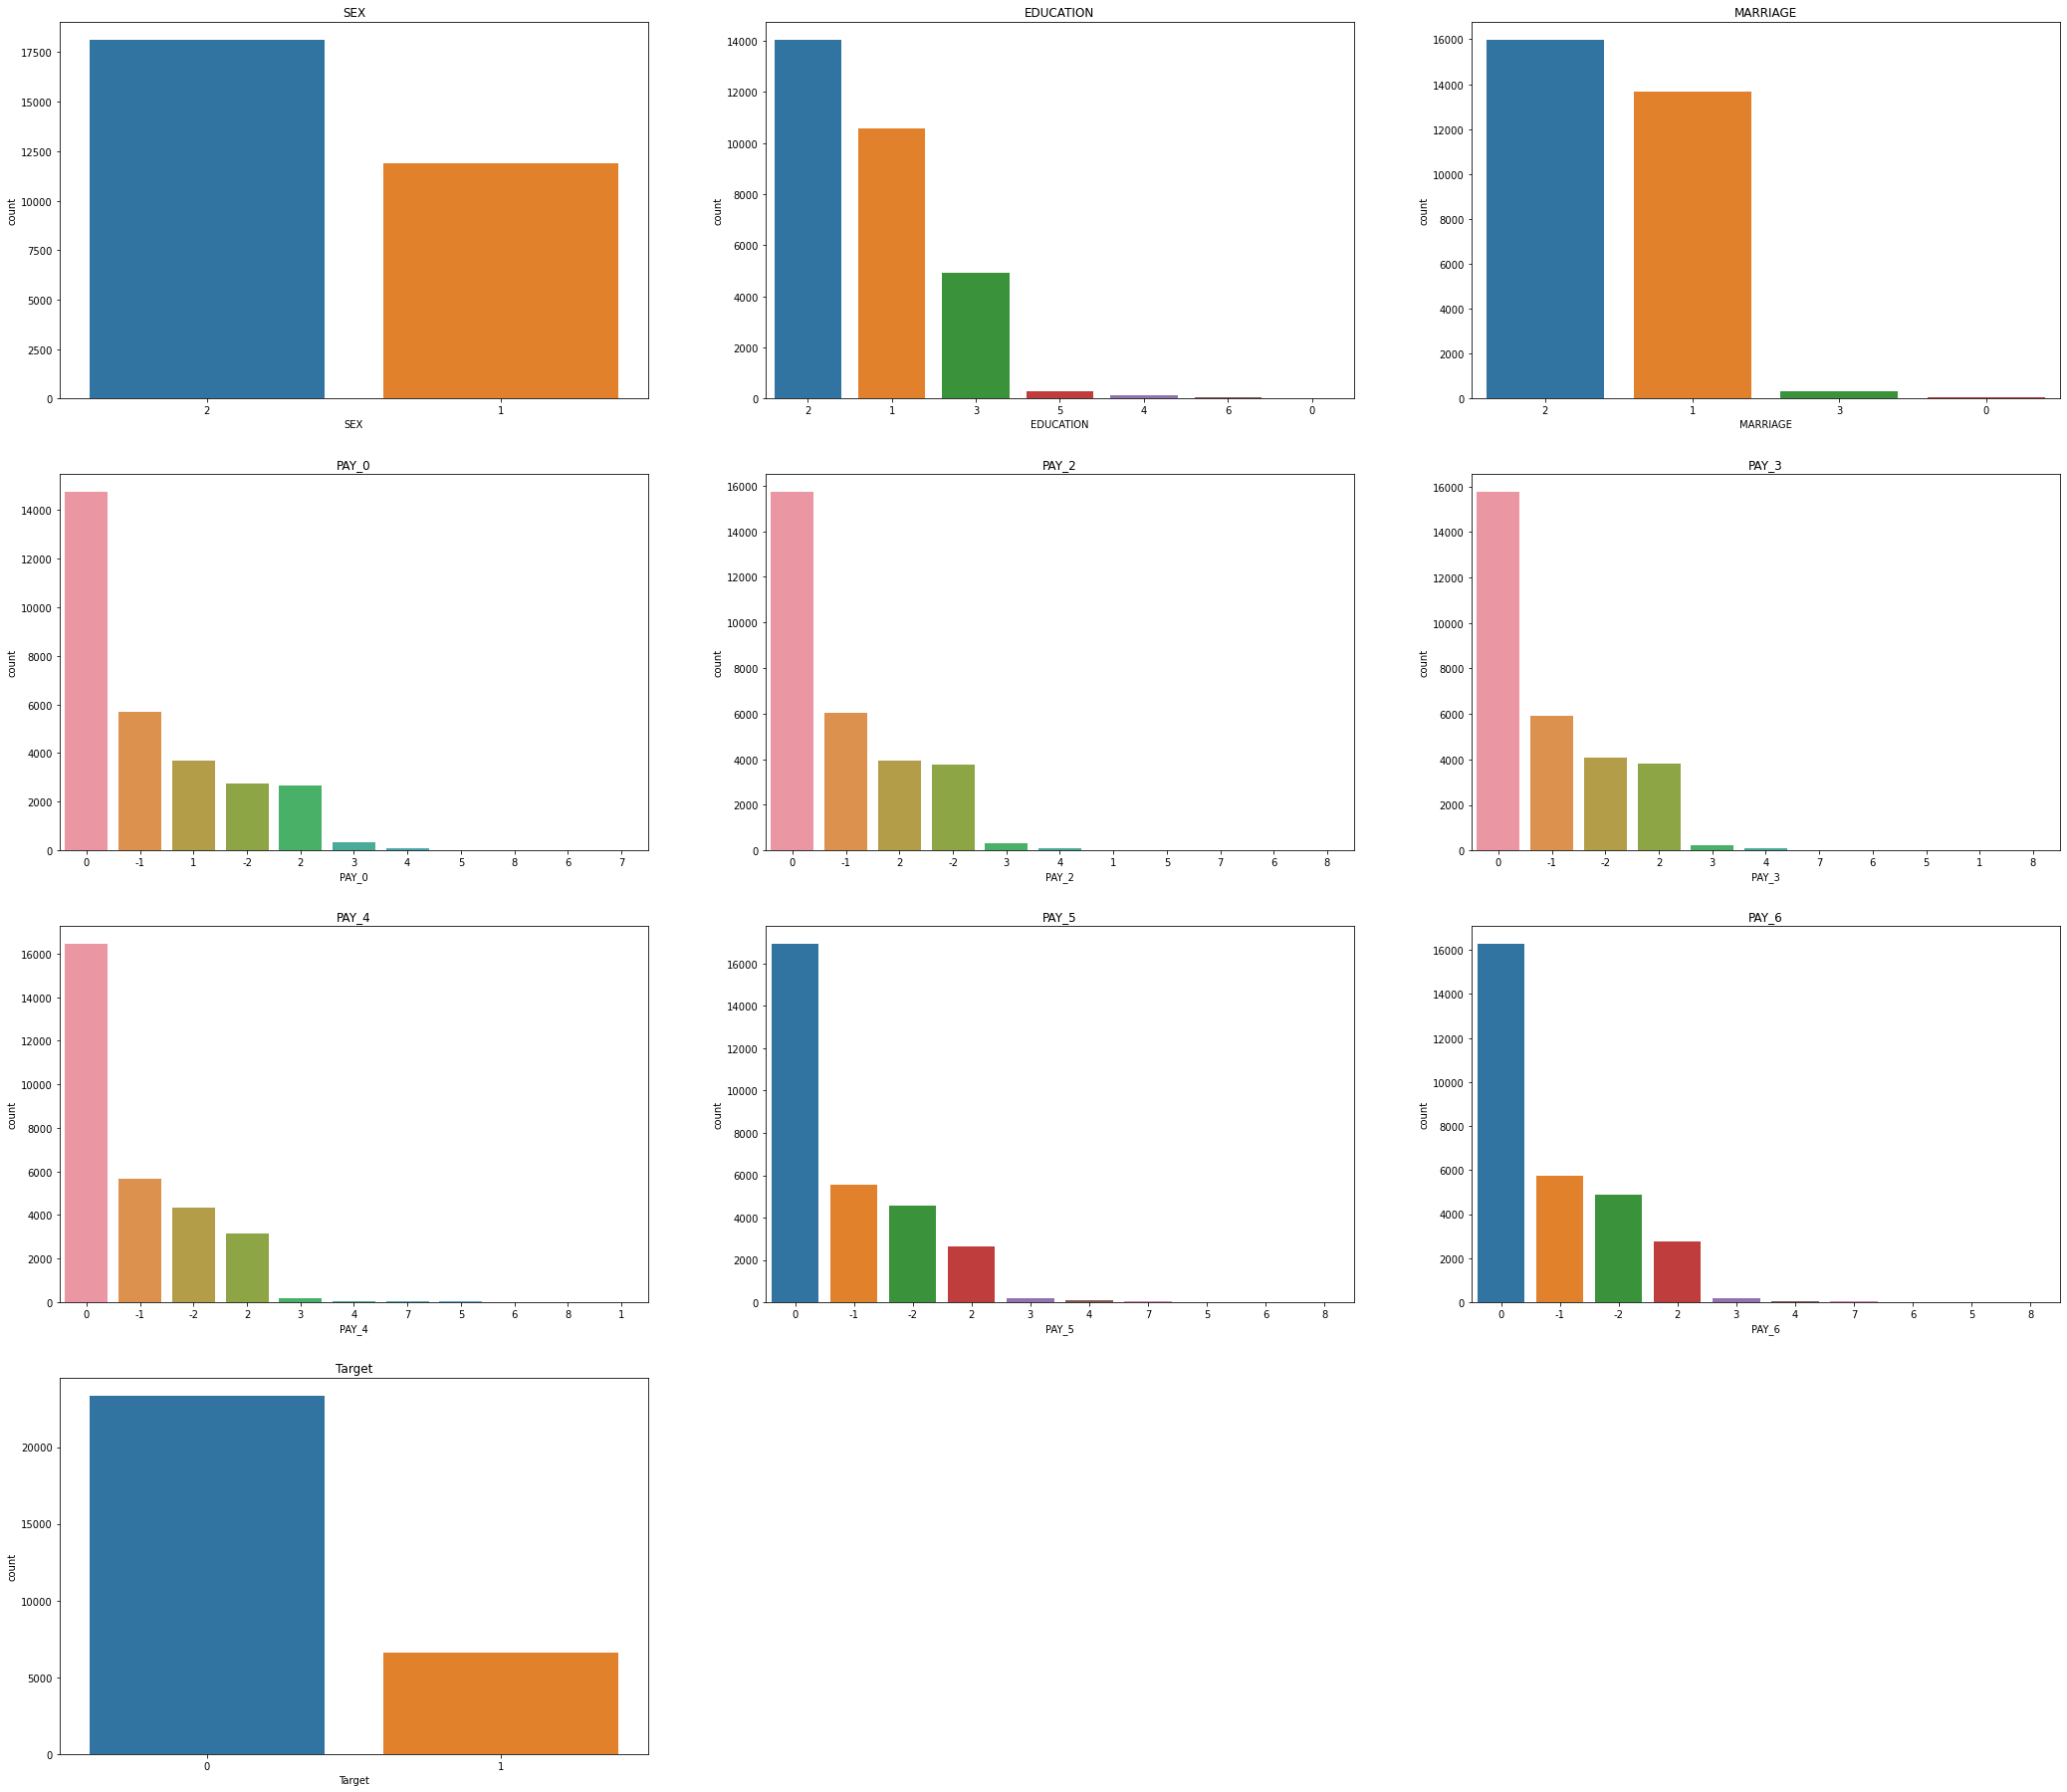

In [77]:
data= df.drop(['ID'],1)
nuniq = data.nunique()
data = df[[col for col in data if nuniq[col]>1 and nuniq[col]<50]]
row, cols = data.shape
colnames = list(data)
graph_perrow = 3
graph_row = (cols+graph_perrow-1)/ graph_perrow
max_graph = 20
plt.figure(figsize=(graph_perrow*12,graph_row*8))
for i in range(min(cols,max_graph)):
    plt.subplot(graph_row,graph_perrow,i+1)
    coldf = data.iloc[:,i]
    if (not np.issubdtype(type(coldf),np.number)):
        sns.countplot(colnames[i],data= data, order= data[colnames[i]].value_counts().index)
    else:
        coldf.hist()
    plt.title(colnames[i])
plt.show()

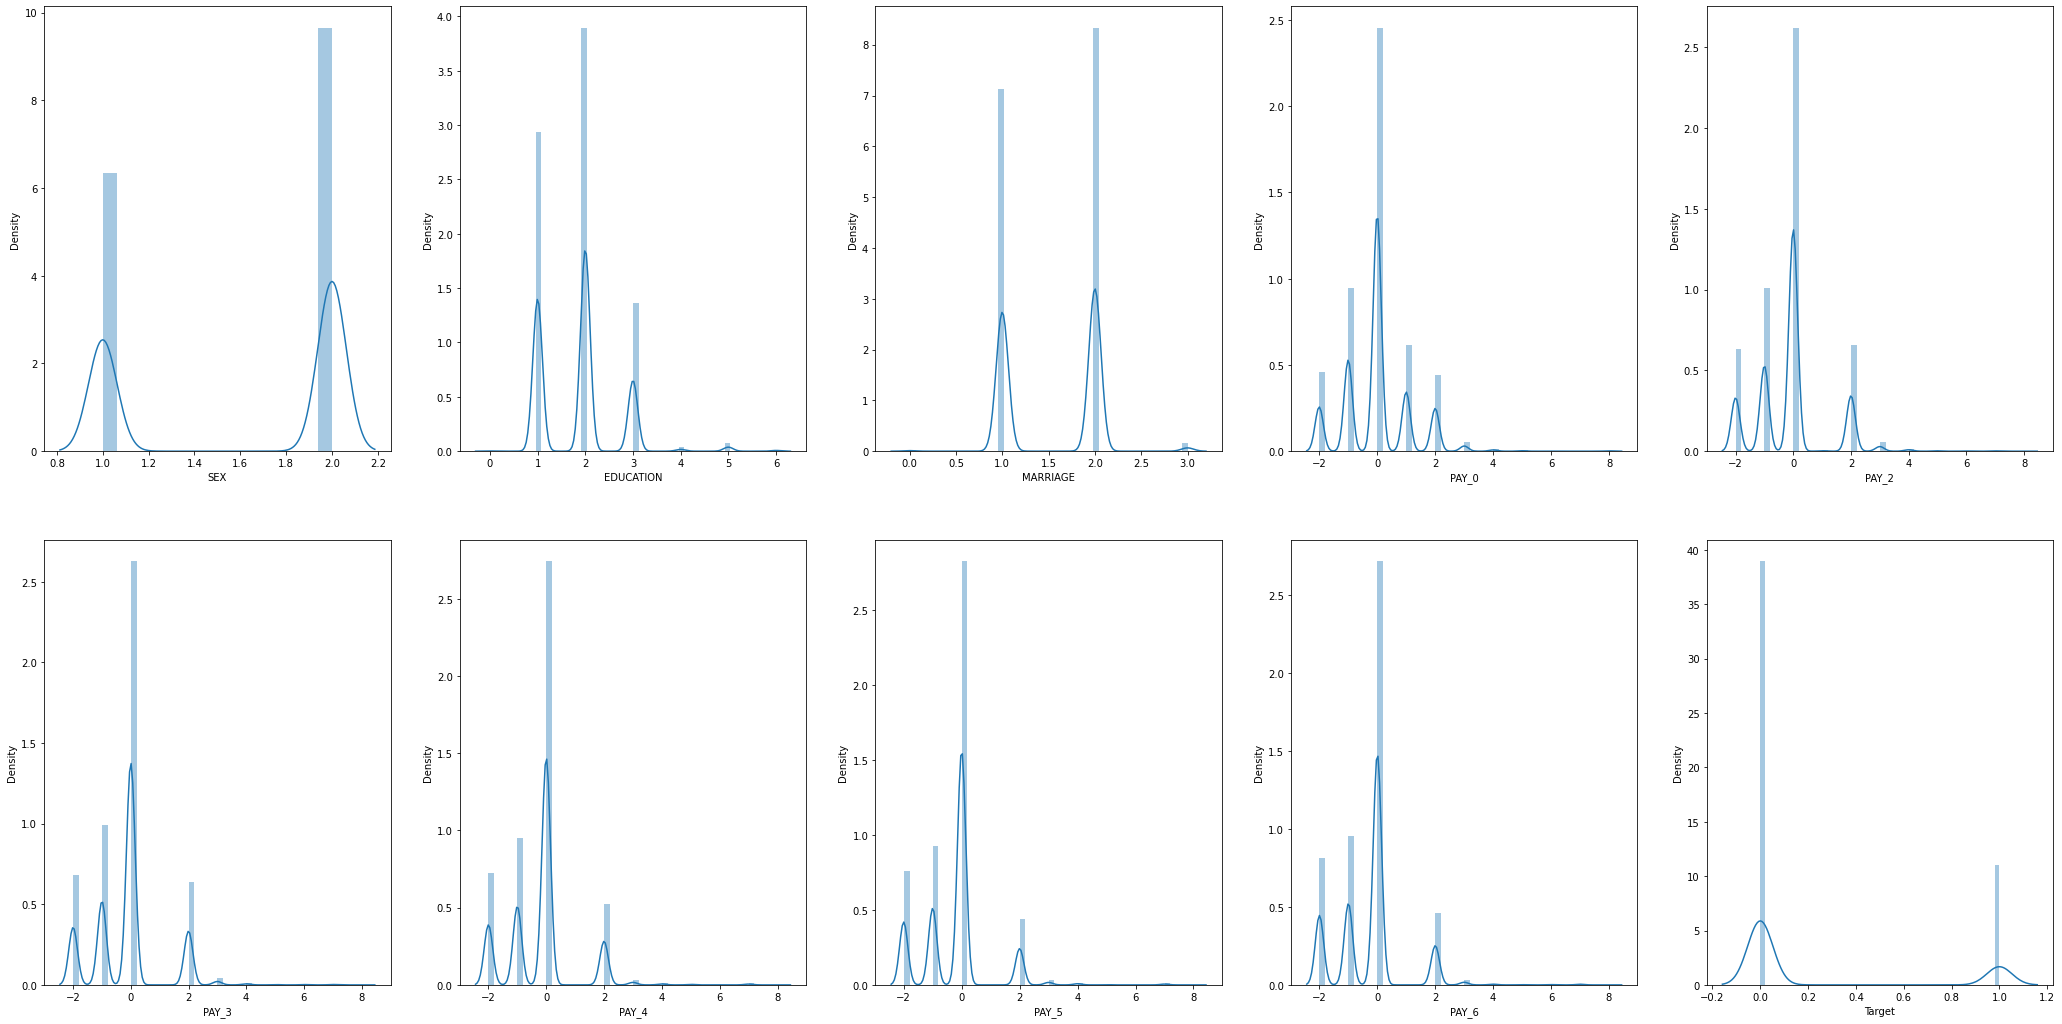

In [78]:
# Density vs Data Features
cont = data.select_dtypes(exclude='object').columns
nrow = (len(cont)+5-1)/5
plt.figure(figsize=(12*3,6*3))
for i,j in enumerate(cont):
    plt.subplot(nrow,5,i+1)
    sns.distplot(df[j])
plt.show()

In [79]:
# Merging the Bill amount columns,Pay coulmns and Pay amount columns as different total one column respectively.

bill_tot = pd.DataFrame(df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'],columns=['bill_tot'])
pay_tot =pd.DataFrame(df['PAY_0']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6'],columns=['pay_tot'])
pay_amt_tot = pd.DataFrame(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'],columns=['pay_amt_tot'])
frames=[bill_tot,pay_tot,pay_amt_tot,df['Target']]
total = pd.concat(frames,axis=1)

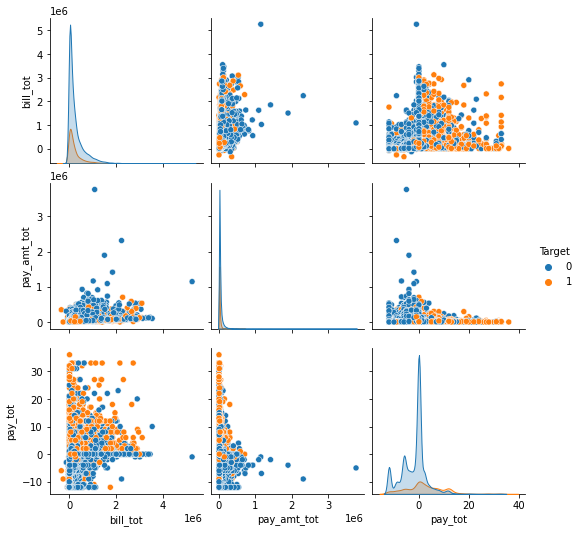

In [80]:
sns.pairplot(total[['bill_tot','pay_amt_tot','pay_tot','Target']],hue='Target')
plt.show()

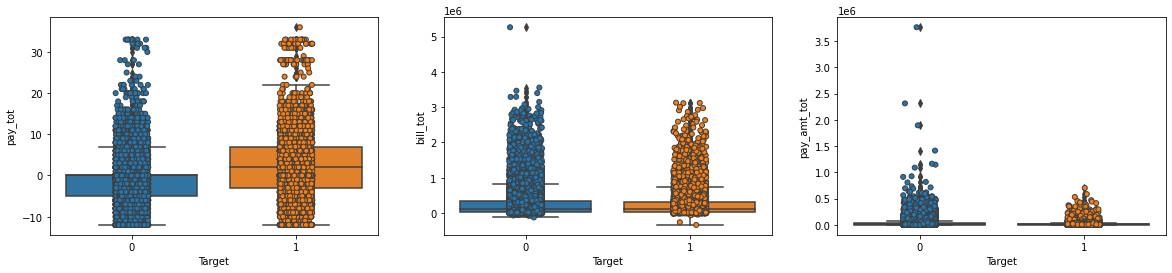

In [81]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.boxplot(x='Target',y='pay_tot',data = total)
sns.stripplot(x='Target',y='pay_tot',data = total,linewidth=1)

plt.subplot(132)
sns.boxplot(x='Target', y='bill_tot',data=total)
sns.stripplot(x='Target', y='bill_tot',data=total,linewidth=1)

plt.subplot(133)
sns.boxplot(x='Target', y='pay_amt_tot',data=total)
sns.stripplot(x='Target', y='pay_amt_tot',data=total,linewidth=1)
plt.show()

In [82]:
age = [20,27,32,37,42,48,58,64,80]
lab = [8,7,6,5,4,3,2,1]
df['AGE'] = pd.cut(df['AGE'],bins= age,labels=lab)

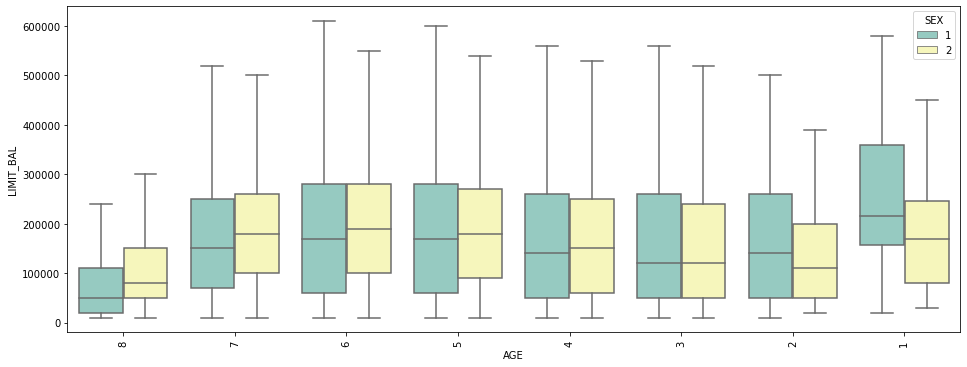

In [83]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="Set3",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

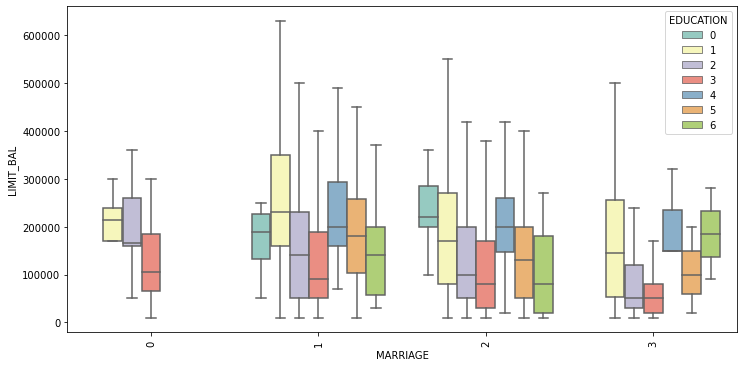

In [84]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

### <font color=orange>Data Interpretation</font>

* Raw Data Contains rows: 30000  columns: 25
* There are 30,000 distinct credit card clients.
* The average value for the amount of credit card limit is 167,484. 
* The standard deviation is unusually large, max value being 1M.
* Education level is mostly graduate school and university.
* Most of the clients are either marrined or single (less frequent the other status).
* Average age is 35.5 years, with a standard deviation of 9.2.
* As the value 0 for Target means 'not default' and value 1 means 'default', 
  the mean of 0.221 means that there are 22.1% of credit card contracts 
  that will default next month (will verify this in the next sections of this analysis).
* There are 81 distinct values for amount of credit limit.
* Indeed, the largest number of credit cards are with limit of 50,000 (3365), 
  followed by 20,000 (1976) and 30,000 (1610).
<img src="Screen Shots/pic1.png" alt="Credit limit distinct values and count" title="Credit limit distinct values and count" />

* Marriage status meaning is:
    * 0 : unknown (let's consider as others as well)
    * 1 : married
    * 2 : single
    * 3 : others
* Sex status meaning is:
    * 1 : male
    * 2 : female
* Education status meaning is:
    * 1 : graduate school
    * 2 : university
    * 3 : high school
    * 4 : others
    * 5 : unknown
    * 6 : unknow
* from the data summary the datset doesnt contain any missing values and all are numeric values 
* Most of the people fall between 20 and 40 years of age
<img src="Screen Shots/pic2.png" alt="age" title="age" />
* from the above,we can see that we have maximum clients from 20-30 age group followed by 31-40. 
* Hence with increasing age group the number of clients that will default the payment next month is decreasing. 
* Hence we can see that Age is important feature to predict the default payment for next month.
* From the above VIF we can see that there are some multicolinearity(values >10) in the data which we can handle.
* we know that the Bill_AMT is the most correlated column so using that we create a data.
* As a thumb rule, any variable with VIF > 1.5 is avoided in a regression analysis. Sometimes the condition is relaxed to 2, instead of 1.5.

In [85]:
df= pd.concat([bill_tot,df],1)
df= df.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],1)

In [86]:
df_fact = pd.DataFrame()
df_fact['Features']= df.columns
df_fact['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
df_fact

,Features,VIF
0,bill_tot,2.204331
1,ID,3.811546
2,LIMIT_BAL,3.667109
3,SEX,9.814152
4,EDUCATION,5.288997
5,MARRIAGE,10.757710
6,AGE,14.245275
7,PAY_0,1.996823
8,PAY_2,3.193387
9,PAY_3,3.709471


* above we can see that now our data doesn't have multicollinearty(no values >10)
* for age we divided it into different groups and labelled it with values
    * 8 : 20-26
    * 7 : 27-31
    * 6 : 32-36
    * 5 : 37-41
    * 4 : 42-47
    * 3 : 48-57
    * 2 : 58-63
    * 1 : 64-max
* Histograms ,density and boxplots are plotted according to the data values.
* The new processed data is stored in a new csv file under name Cleaned_data.csv
* The shape of the new data is rows:30000 columns:20

In [94]:
df.to_csv('Cleaned_data.csv')

In [93]:
df.shape

(30000, 20)